In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import MinMaxScaler

import keras 
from keras.models import Sequential
from keras.layers import LSTM,Dropout,Dense

In [3]:
df=pd.read_csv('ITC.NSE.csv')

In [4]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1996-01-01,5.55000,5.60000,5.53333,5.58333,0.000079,985500.0
1,1996-01-02,5.46667,5.56667,5.28889,5.37222,0.000076,7470000.0
2,1996-01-03,5.13333,5.25444,5.10111,5.20000,0.000074,15160500.0
3,1996-01-04,5.20000,5.33222,5.14444,5.29778,0.000075,12397500.0
4,1996-01-05,5.29778,5.27778,5.18889,5.20222,0.000074,5008500.0


In [5]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
6175,2020-07-01,194.649994,203.850006,194.649994,202.899994,192.977402,44297953.0
6176,2020-07-02,204.449997,206.750000,202.550003,205.850006,195.783142,39320871.0
6177,2020-07-03,208.000000,208.500000,206.000000,207.550003,197.400009,37893277.0
6178,2020-07-06,200.350006,201.949997,198.949997,199.800003,199.800003,34710176.0
6179,2020-07-07,200.000000,200.500000,194.000000,194.250000,194.250000,31263172.0


In [6]:
df.shape

(6180, 7)

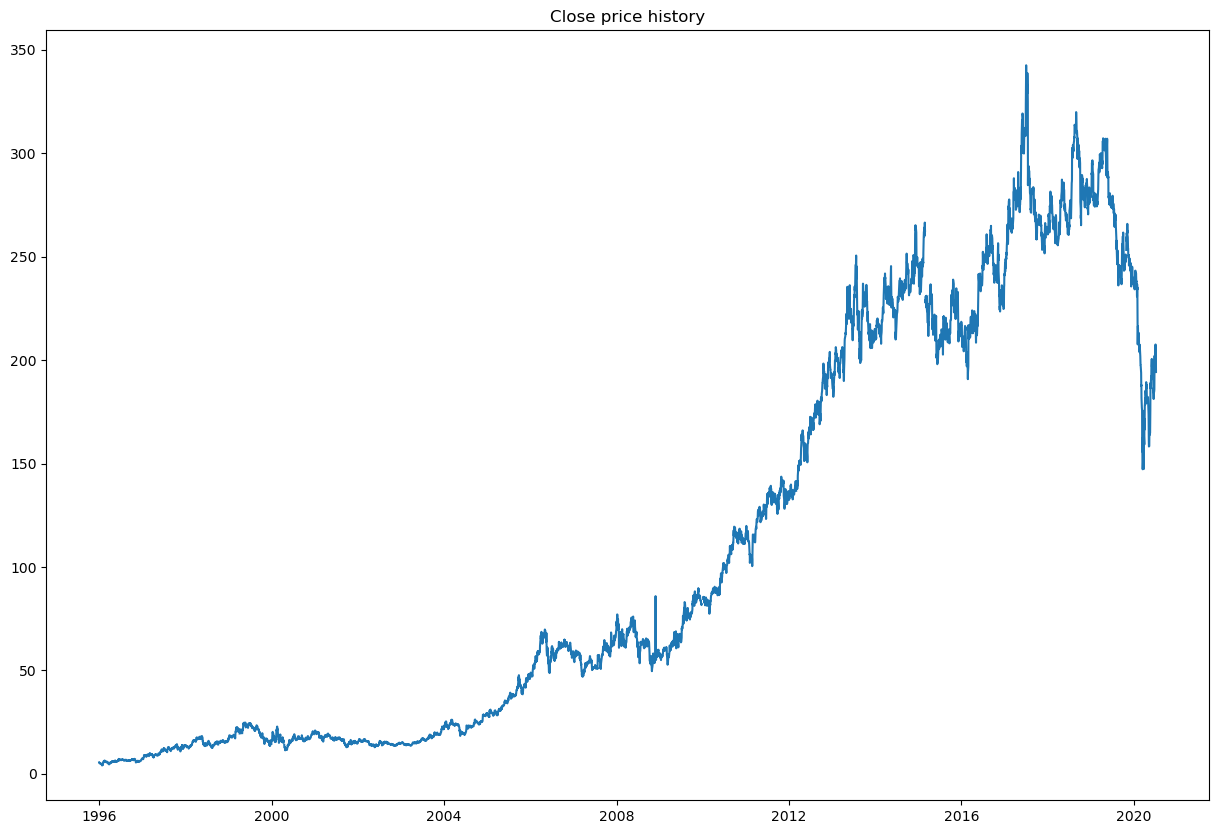

In [16]:
df["Date"]=pd.to_datetime(df.Date,format="%Y-%m-%d")
df.index=df['Date']

plt.figure(figsize=(15,10))
plt.title("Close price history")
plt.plot(df["Close"])

In [9]:
data=df.sort_index(ascending=True,axis=0)

new_dataset=pd.DataFrame(index=range(0,len(df)),columns=["Date",'Close'])

for i in range(len(data)):
    new_dataset["Date"][i]=data["Date"][i]
    new_dataset["Close"][i]=data["Close"][i]
    
new_dataset=new_dataset.dropna()
new_dataset

,Date,Close
0,1996-01-01,5.58333
1,1996-01-02,5.37222
2,1996-01-03,5.2
3,1996-01-04,5.29778
4,1996-01-05,5.20222
...,...,...
6175,2020-07-01,202.899994
6176,2020-07-02,205.850006
6177,2020-07-03,207.550003
6178,2020-07-06,199.800003


In [10]:
scaler=MinMaxScaler()

final_dataset=new_dataset.values

train_data=final_dataset[:4000, :4000]
test_data=final_dataset[4000: , 4000:]

In [11]:
scaled_data=scaler.fit_transform(final_dataset[:,1:])
scaled_data

array([[0.0041414 ],
       [0.0035174 ],
       [0.00300836],
       ...,
       [0.60111468],
       [0.57820722],
       [0.56180252]])

In [12]:
X_train_data, y_train_data = [], []
for i in range(60,len(train_data)):
    X_train_data.append(scaled_data[i-60:i,0])
    y_train_data.append(scaled_data[i,0])
    
X_train_data,y_train_data=np.array(X_train_data),np.array(y_train_data)
X_train_data=np.reshape(X_train_data,(X_train_data.shape[0],X_train_data.shape[1],1))
X_train_data

array([[[0.0041414 ],
        [0.0035174 ],
        [0.00300836],
        ...,
        [0.00168153],
        [0.00187859],
        [0.0026241 ]],

       [[0.0035174 ],
        [0.00300836],
        [0.00329737],
        ...,
        [0.00187859],
        [0.0026241 ],
        [0.00234496]],

       [[0.00300836],
        [0.00329737],
        [0.00301492],
        ...,
        [0.0026241 ],
        [0.00234496],
        [0.00254855]],

       ...,

       [[0.36657186],
        [0.36647435],
        [0.37475055],
        ...,
        [0.38795117],
        [0.38952956],
        [0.39248536]],

       [[0.36647435],
        [0.37475055],
        [0.37760587],
        ...,
        [0.38952956],
        [0.39248536],
        [0.39632791]],

       [[0.37475055],
        [0.37760587],
        [0.38312436],
        ...,
        [0.39248536],
        [0.39632791],
        [0.39859207]]])

In [14]:
lstm_model = Sequential()
lstm_model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train_data.shape[1], 1)))
lstm_model.add(LSTM(units=50))
lstm_model.add(Dense(1))


inputs_data = new_dataset[len(new_dataset) - len(test_data) - 60:].iloc[:, 1:].values
inputs_data = inputs_data.reshape(-1, 1)
inputs_data = scaler.fit_transform(inputs_data)

lstm_model.compile(loss='mean_squared_error', optimizer = 'adam')
lstm_model.fit(X_train_data,y_train_data, epochs=1, batch_size=1, verbose=2)

3940/3940 - 39s - loss: 2.0690e-04 - 39s/epoch - 10ms/step


In [17]:
X_test=[]
for i in range(60,inputs_data.shape[0]):
    X_test.append(inputs_data[i-60:i,0])
X_test=np.array(X_test)

X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
predicted_closing_price=lstm_model.predict(X_test)
predicted_closing_price=scaler.inverse_transform(predicted_closing_price)

65/65 [==============================] - 1s 6ms/step


In [18]:
predicted_closing_price

array([[137.36006],
       [137.91702],
       [138.62602],
       ...,
       [195.97136],
       [198.34729],
       [199.5831 ]], dtype=float32)

C:\Users\online\AppData\Local\Temp\ipykernel_4640\809686405.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Predictions'] = predicted_closing_price


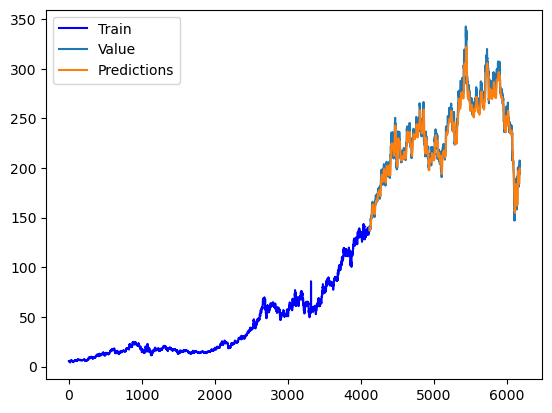

In [19]:
train_data=new_dataset[:4000]
test_data=new_dataset[4000:]
test_data['Predictions'] = predicted_closing_price
plt.plot(train_data['Close'], color='blue', label = 'Actual Stock Price')
plt.plot(test_data[[ 'Close','Predictions']])
plt.legend(['Train','Value','Predictions'],loc='upper left')
plt.show()